In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import datetime

def plot_grid(grid: pd.DataFrame):
    grid["params"] = grid["params"].map(lambda x: str(list(ast.literal_eval(x).values())))
    # Sort the DataFrame by mean_test_score for better visualization
    grid = grid.sort_values(by="mean_test_score", ascending=False)
    grid["total_time"] = grid["mean_fit_time"] + grid["mean_score_time"]

    # Plotting the bar chart
    plt.figure(figsize=(12, 8))
    bars = plt.barh(grid["params"], grid["mean_test_score"], color="skyblue")
    plt.xlabel("Mean Test Score")
    plt.ylabel("Parameter Combination")
    plt.title("Mean Test Scores for Each Parameter Combination")

    # Annotate each bar with the mean_test_score value and time
    for index, bar in enumerate(bars):
        plt.text(
            bar.get_width(),
            bar.get_y() + bar.get_height() / 2,
            s=f"{bar.get_width():.2f}",
            va="center"
        )

        plt.text(
            bar.get_width()/100,
            bar.get_y() + bar.get_height() / 2,
            s=f"{datetime.timedelta(seconds = int(grid['total_time'][index]))}",
            va="center"
        )

    plt.tight_layout()
    plt.show()

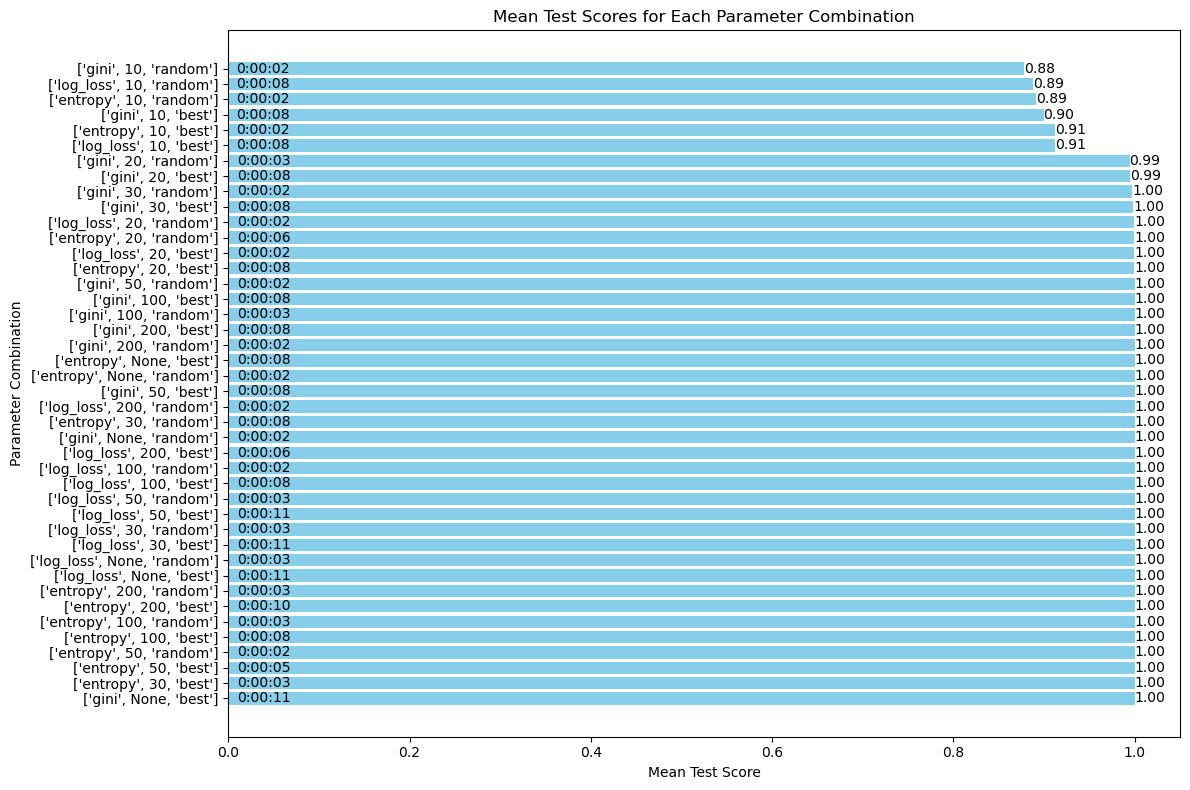

In [98]:
plot_grid(pd.read_csv("output/mnist_original_DecisionTreeClassifier.csv"))

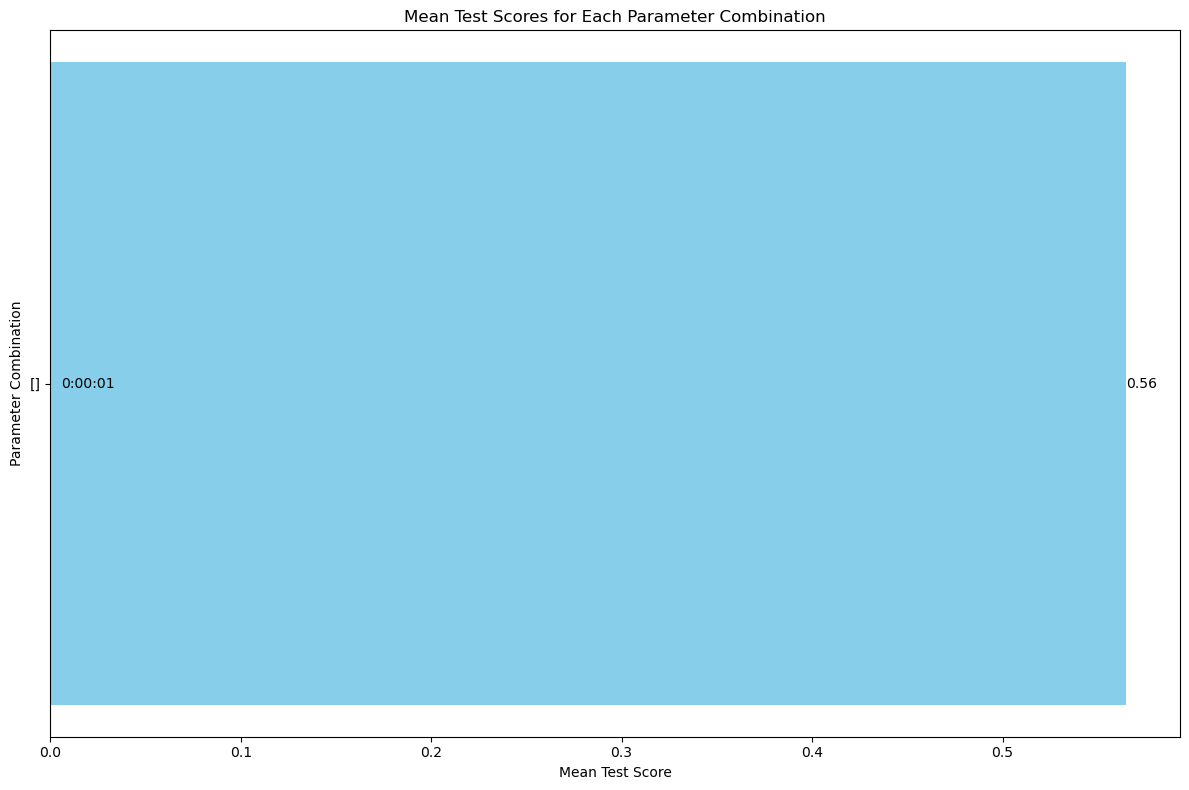

In [99]:
plot_grid(pd.read_csv("output/mnist_original_GaussianNB.csv"))

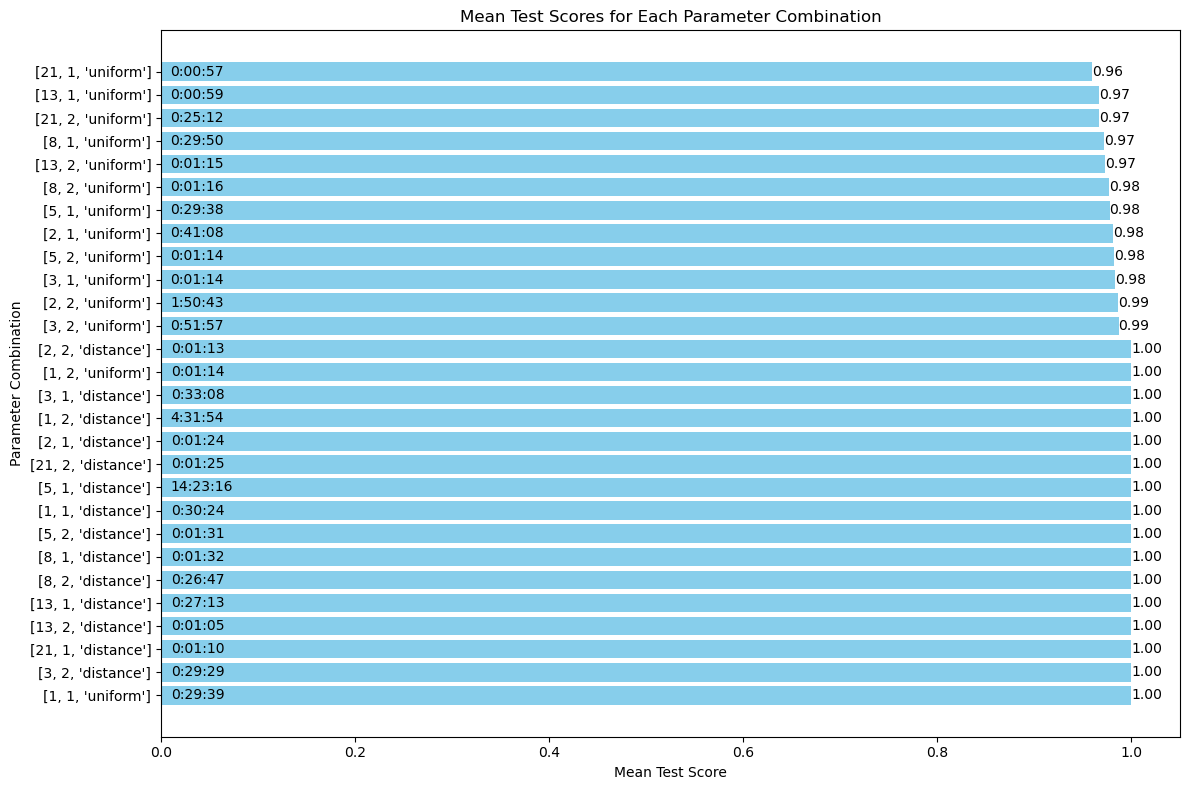

In [100]:
plot_grid(pd.read_csv("output/mnist_original_KNeighborsClassifier.csv"))

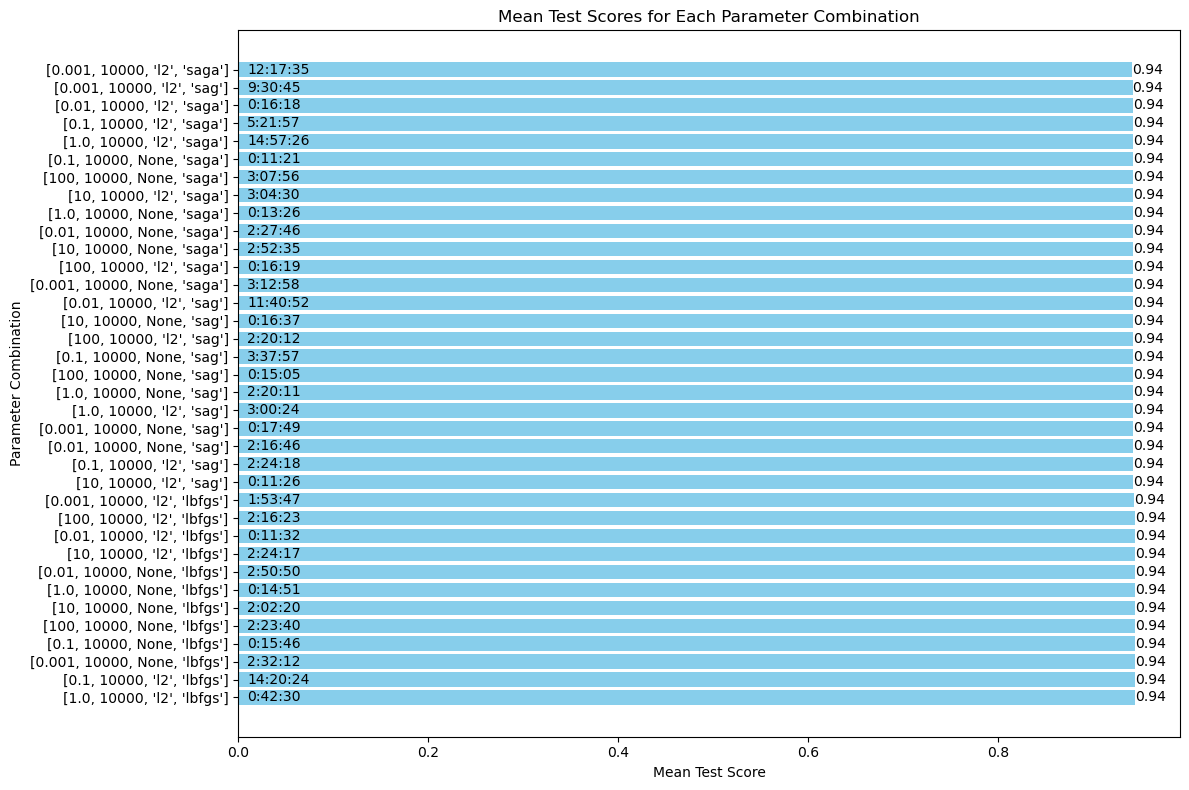

In [101]:
plot_grid(pd.read_csv("output/mnist_original_LogisticRegression.csv"))

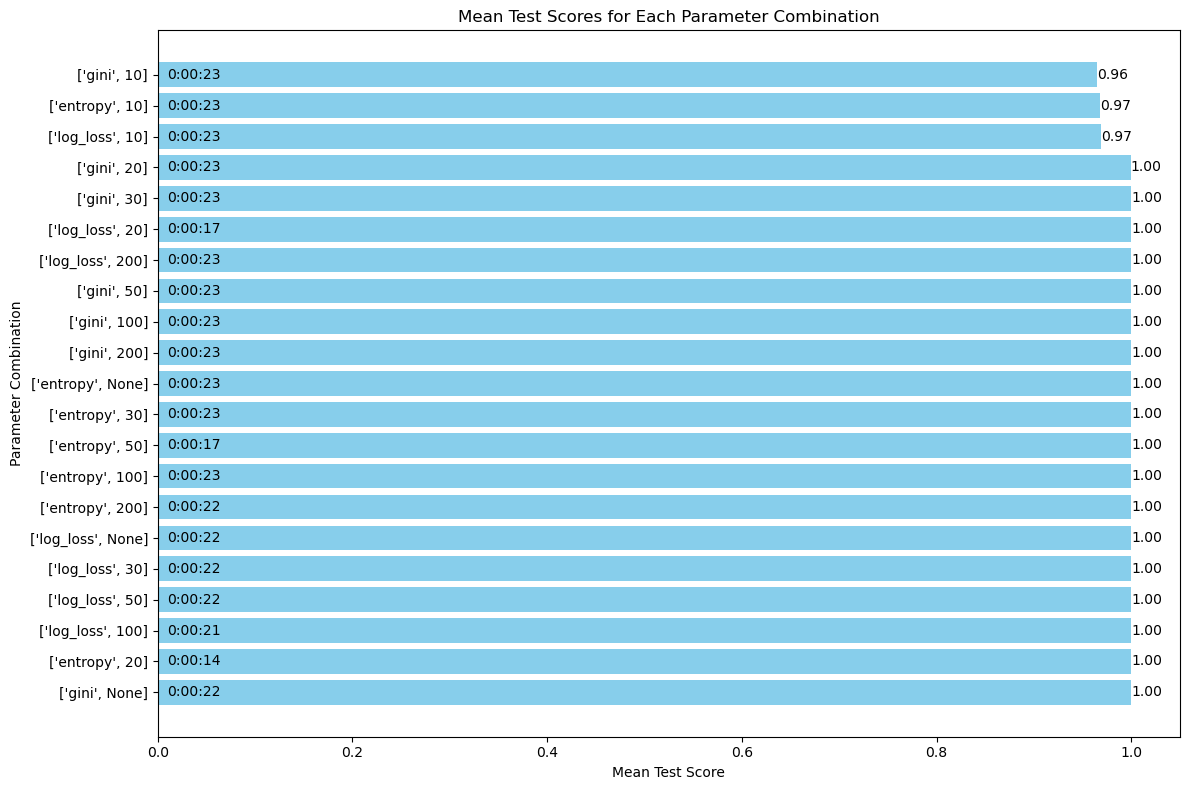

In [102]:
plot_grid(pd.read_csv("output/mnist_original_RandomForestClassifier.csv"))

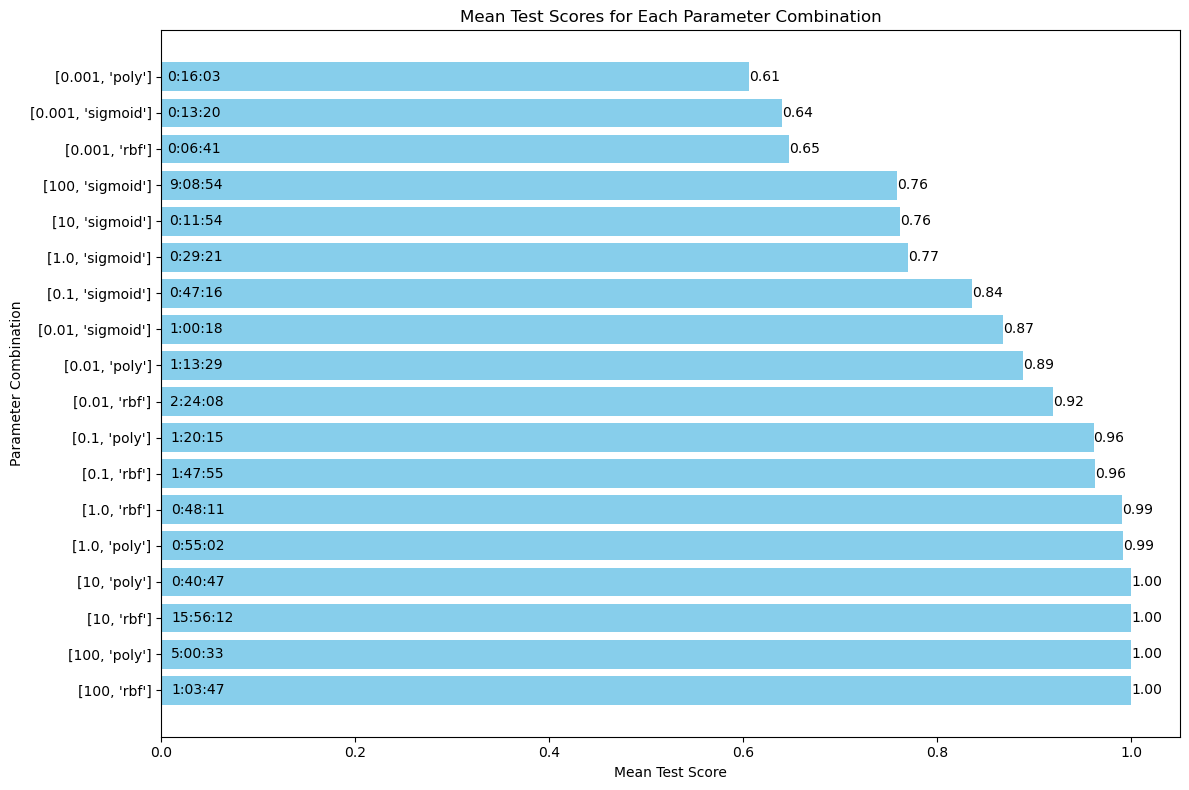

In [103]:
plot_grid(pd.read_csv("output/mnist_original_SVC.csv"))

# Best Model Accuracy scores

In [1]:
import pandas as pd
import time
import ast
from os import walk
from libs.model_processor import create_default_model
from libs.mnist_reader import load_mnist
from sklearn.metrics import accuracy_score

X_train_mnist, Y_train_mnist = load_mnist(path="data/mnist", kind="train")
X_test_mnist, Y_test_mnist = load_mnist(path="data/mnist", kind="t10k")

folder = "output"
filenames = [ f"output/{f}" for f in next(walk(folder), (None, None, []))[2] ]

for file in filenames:
    df = pd.read_csv(file).sort_values(by="mean_test_score", ascending=False).head(1)
    model_name = file.split("/")[1].split(".")[0].split("_")[2]
    best_params = ast.literal_eval(df["params"].iloc[0])
    print(f"For '{model_name}' with {best_params}.")
    start_time = time.time()
    model = create_default_model(name=model_name)
    model.set_params(**best_params)
    model.fit(X_train_mnist, Y_train_mnist)
    pred = model.predict(X_test_mnist)
    score = accuracy_score(Y_test_mnist, pred)
    print(f"Calculation of accuracy score: '{score}' took {(time.time() - start_time)} seconds.")

For 'LogisticRegression' with {'C': 1.0, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculation of accuracy score: '0.9203' took 1181.5955872535706 seconds.
For 'DecisionTreeClassifier' with {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}.
Calculation of accuracy score: '0.8758' took 14.355557918548584 seconds.
For 'GaussianNB' with {}.
Calculation of accuracy score: '0.5558' took 0.5297260284423828 seconds.
For 'RandomForestClassifier' with {'criterion': 'gini', 'max_depth': None}.
Calculation of accuracy score: '0.9699' took 28.681073904037476 seconds.
For 'SVC' with {'C': 100, 'kernel': 'rbf'}.
Calculation of accuracy score: '0.9833' took 302.36216402053833 seconds.
For 'KNeighborsClassifier' with {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}.
Calculation of accuracy score: '0.9631' took 297.0064640045166 seconds.
